In [1]:
import pyaudio
import wave
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. Create an instance of PyAudio
p = pyaudio.PyAudio()

# 2. Get the index of the default input device
default_input_device_index = p.get_default_input_device_info()['index']

# 3. Get the index of the default output device
default_output_device_index = p.get_default_output_device_info()['index']

# 4. Print the default input and output device index
print('Default input device index:', default_input_device_index)
print('Default output device index:', default_output_device_index)

# 5. Print the default input and output device name
print('Default input device name:', p.get_device_info_by_index(default_input_device_index)['name'])
print('Default output device name:', p.get_device_info_by_index(default_output_device_index)['name'])

# 6. Print the default input and output device host API
print('Default input device host API:', p.get_device_info_by_index(default_input_device_index)['hostApi'])
print('Default output device host API:', p.get_device_info_by_index(default_output_device_index)['hostApi'])

# 7. Print the default input and output device host API name
print('Default input device host API name:', p.get_host_api_info_by_index(p.get_device_info_by_index(default_input_device_index)['hostApi'])['name'])
print('Default output device host API name:', p.get_host_api_info_by_index(p.get_device_info_by_index(default_output_device_index)['hostApi'])['name'])

# 8. Print the number of input and output devices
print('Number of input devices:', p.get_host_api_info_by_index(p.get_device_info_by_index(default_input_device_index)['hostApi'])['deviceCount'])
print('Number of output devices:', p.get_host_api_info_by_index(p.get_device_info_by_index(default_output_device_index)['hostApi'])['deviceCount'])

# 9. print the names of all input and output devices
print('Input devices:')
for i in range(p.get_host_api_info_by_index(p.get_device_info_by_index(default_input_device_index)['hostApi'])['deviceCount']):
    print(p.get_device_info_by_host_api_device_index(p.get_device_info_by_index(default_input_device_index)['hostApi'], i)['name'])

print('Output devices:')
for i in range(p.get_host_api_info_by_index(p.get_device_info_by_index(default_output_device_index)['hostApi'])['deviceCount']):
    print(p.get_device_info_by_host_api_device_index(p.get_device_info_by_index(default_output_device_index)['hostApi'], i)['name'])

# 10. Print the number of input and output channels
print('Number of input channels:', p.get_device_info_by_index(default_input_device_index)['maxInputChannels'])
print('Number of output channels:', p.get_device_info_by_index(default_output_device_index)['maxOutputChannels'])




#Terminate the instance of PyAudio
p.terminate()




Default input device index: 1
Default output device index: 6
Default input device name: MADI (1-8) (2- RME MADIface USB
Default output device name: Højttalere (2- Realtek High Def
Default input device host API: 0
Default output device host API: 0
Default input device host API name: MME
Default output device host API name: MME
Number of input devices: 10
Number of output devices: 10
Input devices:
Microsoft Sound Mapper - Input
MADI (1-8) (2- RME MADIface USB
MADI (17-24) (2- RME MADIface U
MADI (9-16) (2- RME MADIface US
Mikrofonmatrice (2- Realtek Hig
Microsoft Sound Mapper - Output
Højttalere (2- Realtek High Def
MADI (1-8) (2- RME MADIface USB
MADI (17-24) (2- RME MADIface U
MADI (9-16) (2- RME MADIface US
Output devices:
Microsoft Sound Mapper - Input
MADI (1-8) (2- RME MADIface USB
MADI (17-24) (2- RME MADIface U
MADI (9-16) (2- RME MADIface US
Mikrofonmatrice (2- Realtek Hig
Microsoft Sound Mapper - Output
Højttalere (2- Realtek High Def
MADI (1-8) (2- RME MADIface USB
MADI (17-2

In [14]:

FREQUNCY = 1000

# create a sine wave with a frequency of 1000 Hz in numpy array that thas is 15 seconds long 
sine_wave = np.sin(2 * np.pi * np.arange(44100 * 5) * FREQUNCY / 44100).astype(np.float32)


In [39]:
FORMAT = pyaudio.paInt16  # Format of the audio samples
CHANNELS = 8              # Number of audio channels (1 for mono, 2 for stereo)
RATE = 44100              # Sampling rate (samples per second)
CHUNK = 1024              # Number of frames per buffer



RECORD_SECONDS = 5        # Duration of the recording in seconds
OUTPUT_FILENAME = "recorded_audio.wav"  # Name of the output file

p1 = pyaudio.PyAudio()
p2 = pyaudio.PyAudio()
p3 = pyaudio.PyAudio()
stream1 = p1.open(format=FORMAT, channels=CHANNELS,
                    rate=RATE, input=True,input_device_index = 1,
                    frames_per_buffer=CHUNK)
stream2 = p2.open(format=FORMAT, channels=CHANNELS,
                    rate=RATE, input=True,input_device_index = 5,
                    frames_per_buffer=CHUNK)
stream3 = p3.open(format=FORMAT, channels=CHANNELS,
                    rate=RATE, output=True,output_device_index = 7,
                    frames_per_buffer=CHUNK)

frames1 = np.zeros((1,8))
frames2 = np.zeros((1,8))

# Record audio in chunks and store in frames
for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data1 = stream1.read(CHUNK)
    data2 = stream2.read(CHUNK)
    
    frame1 = np.frombuffer(data1, dtype=np.int16)
    frame2 = np.frombuffer(data2, dtype=np.int16)

    frame1 = np.reshape(frame1, (CHUNK,CHANNELS))
    frame2 = np.reshape(frame2, (CHUNK,CHANNELS))

    frames1 = np.append(frames1,frame1,axis=0)
    frames2 = np.append(frames2,frame2,axis=0)
    #frames1[i]=frame1
    #frames2[i]=frame2

    #sine_wave = np.sin(2 * np.pi * np.arange(CHUNK) * FREQUNCY / (CHUNK)).astype(np.float32)
    # play the sine wave out of the speaker
    #stream3.write(sine_wave)


print("Recording finished.")

# Stop and close the audio stream
stream1.stop_stream()
stream1.close()
stream2.stop_stream()
stream2.close()
p1.terminate()
p2.terminate()


# Save the recorded audio to a file
#with wave.open(OUTPUT_FILENAME, 'wb') as wf:
#    wf.setnchannels(CHANNELS*2)
#    wf.setsampwidth(p1.get_sample_size(FORMAT))
#    wf.setframerate(RATE)
#    wf.writeframes(b''.join(frames))
    #wf.writeframes(frames.tobytes())



#print(f"Audio saved as {OUTPUT_FILENAME}")


Recording finished.


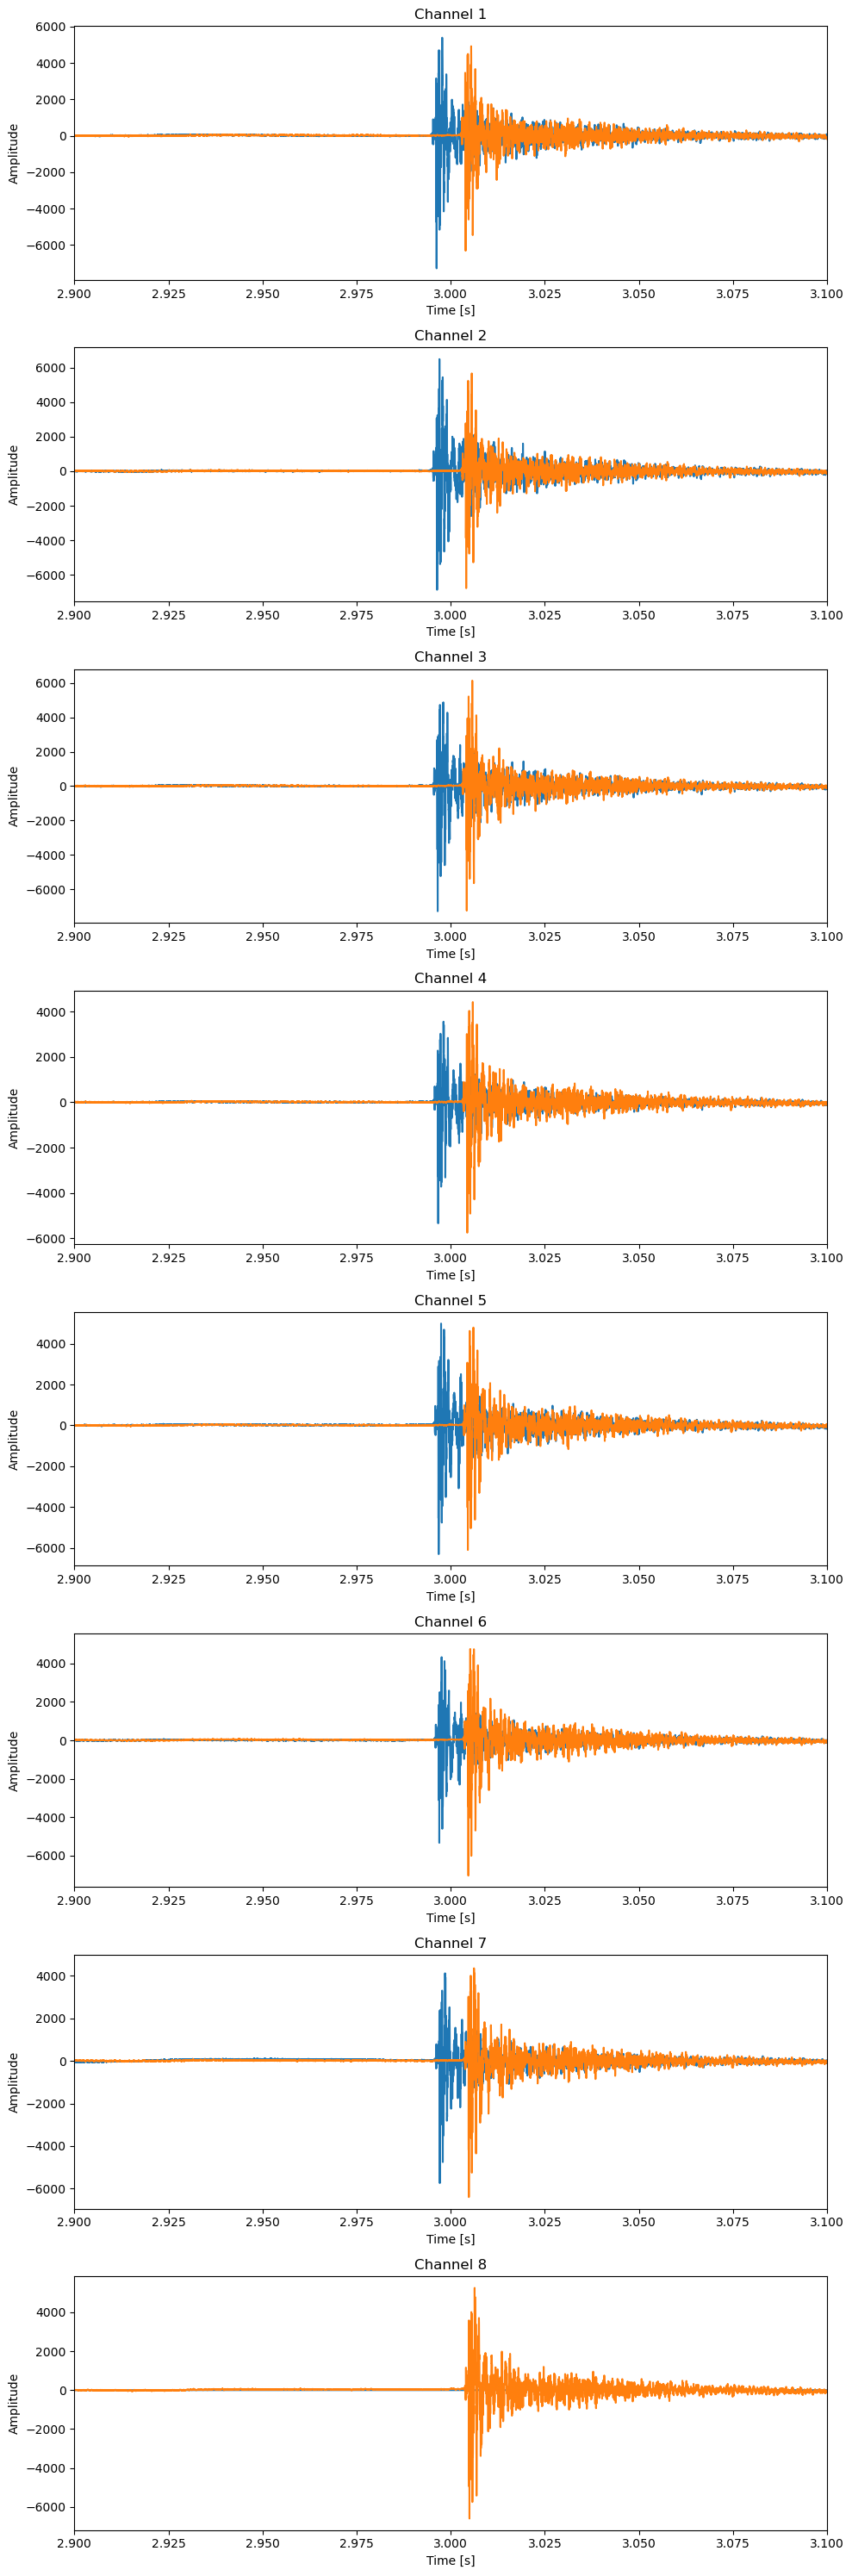

In [44]:
# plot the waveform as subplots of each channel and compare the two recordings
t = np.linspace(0, RECORD_SECONDS, frames1.shape[0])

plt.figure(figsize=(10,30))
for i in range(CHANNELS):
    plt.subplot(8,1,i+1)
    plt.plot(t,frames1[:,i])
    plt.plot(t,frames2[:,i])
    plt.title('Channel '+str(i+1))
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.xlim([2.9,3.1])
plt.tight_layout()






In [122]:
print(frames1[:,0])
print(frames2[:,0])

[ 0. 25. 22. ... 57. 49. 56.]
[ 0. 25. 22. ... 57. 49. 56.]


In [7]:
p = pyaudio.PyAudio()
# get the index of of all input devices
for i in range(32):
    print(p.get_device_info_by_index(i))

p.terminate()

{'index': 0, 'structVersion': 2, 'name': 'Microsoft Sound Mapper - Input', 'hostApi': 0, 'maxInputChannels': 2, 'maxOutputChannels': 0, 'defaultLowInputLatency': 0.09, 'defaultLowOutputLatency': 0.09, 'defaultHighInputLatency': 0.18, 'defaultHighOutputLatency': 0.18, 'defaultSampleRate': 44100.0}
{'index': 1, 'structVersion': 2, 'name': 'MADI (1-8) (2- RME MADIface USB', 'hostApi': 0, 'maxInputChannels': 8, 'maxOutputChannels': 0, 'defaultLowInputLatency': 0.09, 'defaultLowOutputLatency': 0.09, 'defaultHighInputLatency': 0.18, 'defaultHighOutputLatency': 0.18, 'defaultSampleRate': 44100.0}
{'index': 2, 'structVersion': 2, 'name': 'Mikrofonmatrice (2- Realtek Hig', 'hostApi': 0, 'maxInputChannels': 4, 'maxOutputChannels': 0, 'defaultLowInputLatency': 0.09, 'defaultLowOutputLatency': 0.09, 'defaultHighInputLatency': 0.18, 'defaultHighOutputLatency': 0.18, 'defaultSampleRate': 44100.0}
{'index': 3, 'structVersion': 2, 'name': 'MADI (25-32) (2- RME MADIface U', 'hostApi': 0, 'maxInputChann